In [1]:
import numpy as np
import pandas as pd
from scipy import stats

pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import linear_model

/Users/shonakamura/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/shonakamura/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
X = pd.read_csv('10-3-1-large-data.csv')
X.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,1.000,0.500,0.333,0.250,0.200,0.167,0.143,0.125,0.111,0.100,...,0.011,0.011,0.011,0.011,0.011,0.01,0.01,0.01,0.01,0.01
1,0.500,0.333,0.250,0.200,0.167,0.143,0.125,0.111,0.100,0.091,...,0.011,0.011,0.011,0.011,0.010,0.01,0.01,0.01,0.01,0.01
2,0.333,0.250,0.200,0.167,0.143,0.125,0.111,0.100,0.091,0.083,...,0.011,0.011,0.011,0.010,0.010,0.01,0.01,0.01,0.01,0.01
3,0.250,0.200,0.167,0.143,0.125,0.111,0.100,0.091,0.083,0.077,...,0.011,0.011,0.010,0.010,0.010,0.01,0.01,0.01,0.01,0.01
4,0.200,0.167,0.143,0.125,0.111,0.100,0.091,0.083,0.077,0.071,...,0.011,0.010,0.010,0.010,0.010,0.01,0.01,0.01,0.01,0.01


In [3]:
round(np.mean(X.X_1), 3)

0.037

In [4]:
np.mean(X, axis=0).head()

X_1    0.037
X_2    0.031
X_3    0.027
X_4    0.025
X_5    0.024
dtype: float64

In [5]:
X -= np.mean(X, axis=0)
X /= np.std(X, ddof=1, axis=0)

In [6]:
np.mean(X, axis=0).head().round(3)

X_1    0.0
X_2   -0.0
X_3    0.0
X_4   -0.0
X_5    0.0
dtype: float64

In [7]:
np.std(X, ddof=1, axis=0).head().round(3)

X_1    1.0
X_2    1.0
X_3    1.0
X_4    1.0
X_5    1.0
dtype: float64

In [8]:
np.random.seed(1)
noise = stats.norm.rvs(loc=0, scale=1, size=X.shape[0])

y = X.X_1 * 5 + noise

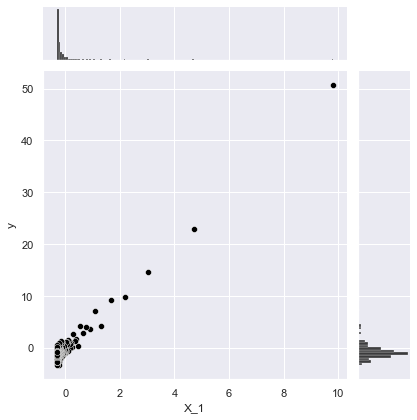

In [9]:
large_data = pd.concat([pd.DataFrame({'y':y}), X], axis=1)
sns.jointplot(y='y', x='X_1', data=large_data, color='black')

In [10]:
lm_statsmodels = sm.OLS(endog=y, exog=X).fit()
lm_statsmodels.params.head()

X_1     14.755
X_2    -87.463
X_3    211.743
X_4    -94.153
X_5    -68.175
dtype: float64

In [11]:
lm_sklearn = linear_model.LinearRegression()
lm_sklearn.fit(X, y)
lm_sklearn.coef_

array([ 1.476e+01, -8.746e+01,  2.117e+02, -9.415e+01, -6.817e+01,
       -9.284e+01,  1.761e+00,  8.170e+01,  6.680e+01,  2.788e+01,
       -3.288e+01,  6.818e+01, -1.699e+01,  2.208e+01, -4.855e+01,
       -3.390e+01, -4.536e+01,  9.728e+00,  2.481e+01,  1.858e+00,
        1.599e+00, -2.838e+01,  6.477e+00, -5.980e+01,  3.532e+01,
       -1.302e+01,  4.108e+01, -4.303e+01,  5.247e+01,  1.920e+00,
        3.342e+01,  8.490e+00,  8.329e+00, -2.293e+01, -3.577e+01,
       -1.337e+01,  3.178e+01, -2.018e+01, -2.654e+01, -3.523e+01,
        1.927e+01,  4.823e+01, -1.655e+00,  5.749e-01, -1.893e+01,
        7.370e-01,  1.047e+01, -7.732e+00, -1.854e+00, -2.559e-01,
       -5.045e+00, -4.227e+00,  2.523e+01,  1.616e+01, -1.310e+01,
        6.455e+00, -1.332e+01, -2.291e+01, -1.202e+01,  7.745e+00,
        1.755e+01,  5.997e+00,  4.648e+00,  4.120e+00, -1.825e+00,
        5.366e+00,  4.546e+00, -2.598e+00, -4.091e+00,  7.496e+00,
        3.100e+01,  1.530e+01, -5.323e+00, -1.509e+01, -3.801e

In [12]:
n_alphas = 50
ridge_alphas = np.logspace(-2, 0.7, n_alphas)

In [13]:
np.log10(ridge_alphas)

array([-2.   , -1.945, -1.89 , -1.835, -1.78 , -1.724, -1.669, -1.614,
       -1.559, -1.504, -1.449, -1.394, -1.339, -1.284, -1.229, -1.173,
       -1.118, -1.063, -1.008, -0.953, -0.898, -0.843, -0.788, -0.733,
       -0.678, -0.622, -0.567, -0.512, -0.457, -0.402, -0.347, -0.292,
       -0.237, -0.182, -0.127, -0.071, -0.016,  0.039,  0.094,  0.149,
        0.204,  0.259,  0.314,  0.369,  0.424,  0.48 ,  0.535,  0.59 ,
        0.645,  0.7  ])

In [14]:
ridge_coefs = []

for a in ridge_alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

In [15]:
ridge_coefs = np.array(ridge_coefs)
ridge_coefs.shape

(50, 100)

Text(0, 0.5, 'Coefficients')

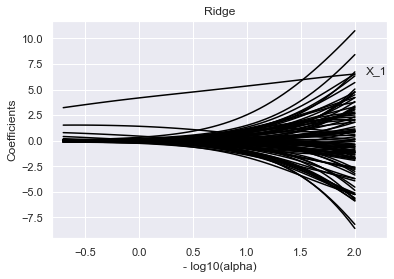

In [16]:
log_alphas = -np.log10(ridge_alphas)

plt.plot(log_alphas, ridge_coefs, color='black')

plt.text(max(log_alphas) + 0.1, ridge_coefs[0, 0], 'X_1')

plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])

plt.title('Ridge')
plt.xlabel('- log10(alpha)')
plt.ylabel('Coefficients')

In [17]:
ridge_best = linear_model.RidgeCV(cv=10, alphas=ridge_alphas, fit_intercept=False)
ridge_best.fit(X, y)

round(-np.log10(ridge_best.alpha_), 3)

0.237

In [18]:
round(ridge_best.alpha_, 3)

0.58

In [19]:
ridge_best.coef_.round(2)

array([ 4.46,  1.29,  0.29, -0.09, -0.2 , -0.23, -0.22, -0.21, -0.14,
       -0.14, -0.15, -0.05, -0.1 , -0.02, -0.11, -0.01, -0.09,  0.01,
       -0.02, -0.03,  0.02, -0.03,  0.04, -0.09,  0.13,  0.02,  0.06,
       -0.08,  0.14, -0.01,  0.1 ,  0.12, -0.04,  0.04, -0.03,  0.02,
        0.12, -0.17, -0.01, -0.18,  0.09,  0.22,  0.04, -0.03, -0.01,
        0.03,  0.34, -0.19, -0.11,  0.21, -0.13, -0.25,  0.25,  0.13,
       -0.16,  0.27,  0.03, -0.17, -0.18,  0.16, -0.01,  0.01,  0.19,
        0.13, -0.16, -0.02,  0.26,  0.22, -0.18,  0.01,  0.53,  0.18,
       -0.35, -0.12,  0.23, -0.04, -0.12, -0.05,  0.21,  0.19, -0.04,
       -0.2 , -0.1 ,  0.06, -0.22,  0.15, -0.04, -0.11,  0.21,  0.01,
        0.13, -0.03, -0.02, -0.23, -0.2 ,  0.24, -0.31, -0.4 , -0.16,
        0.16])

In [21]:
lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(X, y, fit_intercept=False)

ValueError: ('Unexpected parameters in params', dict_keys(['fit_intercept']))

In [23]:
log_alphas = -np.log10(lasso_alphas)

plt.plot(log_alphas, lasso_coefs.T, color='black')

plt.text(max(log_alphas) + 0.1, lasso_coefs[0, -1], 'X_1')

plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])

plt.title('Lasso')
plt.xlabel('- log10(alpha)')
plt.ylabel('Coefficients')

NameError: name 'lasso_alphas' is not defined

In [24]:
lasso_best = linear_model.LassoCV(cv=10, alphas=lasso_alphas, fit_intercept=False)
lasso_best.fit(X, y)

round(-np.log10(lasso_best.alpha_), 3)

NameError: name 'lasso_alphas' is not defined

In [25]:
round(lasso_best.alpha_, 3)

NameError: name 'lasso_best' is not defined

In [26]:
lasso_best.coef_.round(2)

NameError: name 'lasso_best' is not defined

In [27]:
print(X.iloc[0:1, ])

     X_1    X_2    X_3    X_4    X_5    X_6    X_7    X_8    X_9   X_10  ...  \
0  9.828  8.123  7.108  6.429  5.937  5.561  5.261  5.013  4.805  4.628  ...   

    X_91   X_92   X_93   X_94   X_95   X_96   X_97  X_98   X_99  X_100  
0  2.396  2.401  2.405  2.354  2.354  2.354  2.353  2.35  2.346  2.342  

[1 rows x 100 columns]


In [28]:
lasso_best.predict(X=X.iloc[0:1, ])

NameError: name 'lasso_best' is not defined

In [30]:
import numpy as np
import pandas as pd

pd.set_option('display.precision', 3)
np.set_printoptions(precision=3)

import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn.datasets import make_circles

from sklearn.model_selection import train_test_split

In [31]:
beer = pd.read_csv('8-1-1-beer.csv')
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


In [32]:
lm_stats = smf.ols(formula='beer ~ temperature', data=beer).fit()
lm_stats.params

Intercept      34.610
temperature     0.765
dtype: float64

In [33]:
lm_stats.predict(pd.DataFrame({'temperature': [20]}))

0    49.919
dtype: float64

In [34]:
X_beer = beer['temperature'].to_numpy().reshape(-1, 1)
y_beer = beer['beer'].to_numpy()

In [35]:
X_beer

array([[20.5],
       [25. ],
       [10. ],
       [26.9],
       [15.8],
       [ 4.2],
       [13.5],
       [26. ],
       [23.3],
       [ 8.5],
       [26.2],
       [19.1],
       [24.3],
       [23.3],
       [ 8.4],
       [23.5],
       [13.9],
       [35.5],
       [27.2],
       [20.5],
       [10.2],
       [20.5],
       [21.6],
       [ 7.9],
       [42.2],
       [23.9],
       [36.9],
       [ 8.9],
       [36.4],
       [ 6.4]])

In [36]:
lm_sk = LinearRegression().fit(X_beer, y_beer)
print(np.round(lm_sk.intercept_, 3))
print(np.round(lm_sk.coef_, 3))

34.61
[0.765]


In [37]:
lm_sk.predict(np.array(20).reshape(-1, 1))

array([49.919])

In [38]:
pred_lm_all = lm_sk.predict(X_beer)
resid = pred_lm_all - y_beer
ss_t = np.sum((y_beer - np.mean(y_beer))**2)
r2 = 1 - np.sum(resid**2) / ss_t
round(r2, 3)

0.504

In [39]:
round(lm_sk.score(X_beer, y_beer), 3)

0.504

In [41]:
nnet_reg = MLPRegressor(random_state=1,
                        hidden_layer_sizes=(1, ),
                        activation='identity', alpha=0,
                        solver='lbfgs', max_iter=500,
                        ).fit(X_beer, y_beer)
print('切片', nnet_reg.intercepts_)
print('係数', nnet_reg.coefs_)

切片 [array([-42.901]), array([25.803])]
係数 [array([[-3.728]]), array([[-0.205]])]


In [42]:
nnet_reg.intercepts_[0] * nnet_reg.coefs_[1] + nnet_reg.intercepts_[1]

array([[34.61]])

In [43]:
nnet_reg.coefs_[0] * nnet_reg.coefs_[1]

array([[0.765]])

In [44]:
nnet_reg.predict(np.array(20).reshape(-1, 1))

array([49.919])

In [45]:
(nnet_reg.intercepts_[0] + nnet_reg.coefs_[0] * 20) * nnet_reg.coefs_[1] + nnet_reg.intercepts_[1]

array([[49.919]])

In [46]:
round(nnet_reg.score(X_beer, y_beer), 3)

0.504

In [47]:
test_result = pd.read_csv('9-2-1-logistic-regression.csv')
test_result.head()

,hours,result
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [48]:
glm_stats = smf.glm(formula = 'result ~ hours', data = test_result, family=sm.families.Binomial()).fit()
glm_stats.params

Intercept   -4.559
hours        0.929
dtype: float64

In [49]:
glm_stats.predict(pd.DataFrame({'hours': [3]}))

0    0.145
dtype: float64

In [50]:
X_bin = test_result['hours'].to_numpy().reshape(-1, 1)
y_bin = test_result['result'].to_numpy()

In [51]:
glm_sk = LogisticRegression(random_state=1, penalty='none').fit(X_bin, y_bin)
print(np.round(glm_sk.intercept_, 3))
print(np.round(glm_sk.coef_, 3))

[-4.559]
[[0.929]]


/Users/shonakamura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [52]:
glm_sk.predict_proba(np.array(3).reshape(-1, 1))

array([[0.855, 0.145]])

In [53]:
glm_sk.predict(np.array(3).reshape(-1, 1))

array([0])

In [54]:
np.sum(glm_sk.predict(X_bin) == y_bin) / len(y_bin)

0.84

In [55]:
glm_sk.score(X_bin, y_bin)

0.84

In [56]:
nnet_clf = MLPClassifier(random_state = 1,
                         hidden_layer_sizes = (1, ),
                         activation='identity', alpha=0,
                         solver='lbfgs', max_iter=500,
                        ).fit(X_bin, y_bin)

print('切片', nnet_clf.intercepts_)
print('係数', nnet_clf.coefs_)

切片 [array([1.595]), array([-1.195])]
係数 [array([[-0.441]]), array([[-2.109]])]


In [57]:
nnet_clf.intercepts_[0] * nnet_clf.coefs_[1] + nnet_clf.intercepts_[1]

array([[-4.559]])

In [58]:
nnet_clf.coefs_[0] * nnet_clf.coefs_[1]

array([[0.929]])

In [59]:
nnet_clf.predict_proba(np.array(3).reshape(-1, 1))

array([[0.855, 0.145]])

In [60]:
nnet_clf.predict(np.array(3).reshape(-1, 1))

array([0])

In [61]:
tmp = (nnet_clf.intercepts_[0] + nnet_clf.coefs_[0] * 3) * nnet_clf.coefs_[1] + nnet_clf.intercepts_[1]

In [62]:
1 / (1 + np.exp(-tmp))

array([[0.145]])

In [63]:
nnet_clf.score(X_bin, y_bin)

0.84

In [64]:
X, y = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=1)

In [65]:
print('行数と列数', X.shape)
print('先頭の３行')
print(X[0:3, ::])

行数と列数 (100, 2)
先頭の３行
[[-0.383 -0.091]
 [-0.021 -0.478]
 [-0.396 -1.289]]


In [66]:
print('行数と列数', y.shape)
print('先頭の3つのデータ')
print(y[0:3])

行数と列数 (100,)
先頭の3つのデータ
[1 1 0]


<AxesSubplot:>

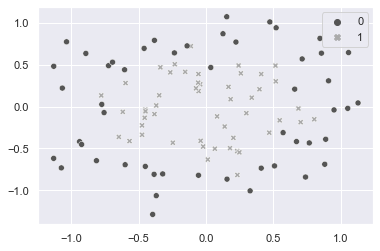

In [67]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='gray', style=y)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

In [69]:
print('行数と列数 X_train:', X_train.shape)
print('行数と列数 X_test:', X_test.shape)
print('行数と列数 y_train:', y_train.shape)
print('行数と列数 y_test:', y_test.shape)

行数と列数 X_train: (75, 2)
行数と列数 X_test: (25, 2)
行数と列数 y_train: (75,)
行数と列数 y_test: (25,)


In [70]:
circle_glm = LogisticRegression(random_state=0, penalty='none').fit(X_train, y_train)

/Users/shonakamura/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [71]:
print('訓練:', round(circle_glm.score(X_train, y_train), 3))
print('テスト：', round(circle_glm.score(X_test, y_test), 3))

訓練: 0.467
テスト： 0.36


In [72]:
circle_nnet = MLPClassifier(random_state=1,
                            hidden_layer_sizes=(100, ),
                            activation='relu', alpha=0.5,
                            solver='lbfgs', max_iter=5000
                           ).fit(X_train, y_train)

In [73]:
print('訓練:', round(circle_nnet.score(X_train, y_train), 3))
print('テスト：', round(circle_nnet.score(X_test, y_test), 3))

訓練: 0.96
テスト： 0.88
